# Project Title

# Credit Default Risk Prediction Using Machine Learning 

# Problem Statement

Loan defaults pose a major financial risk for banks and lending institutions. Approving loans without accurately assessing a customer’s repayment ability can lead to increased non-performing assets and financial losses. Traditional credit evaluation methods often rely on limited rules and manual judgment, which may not effectively capture complex patterns in customer financial behavior.

The objective of this project is to develop a **machine learning–based Credit Default Risk Prediction system** that analyzes multiple customer attributes such as income, savings, monthly expenses, loan amount, credit history, and demographic information to predict whether a customer is likely to default on a loan. This system aims to support lenders in making **data-driven, accurate, and reliable credit approval decisions** while minimizing default risk

# Objective

The goal of this project is to **predict whether a customer is likely to default on a loan**
using demographic, financial, and credit-related features.

This helps financial institutions:

  Reduce credit risk

  Make better loan approval decisions

  Identify high-risk customers early

**Problem Type**: Binary Classification

0 → No default
1 → Default risk

# Dataset Description

The dataset contains **10,000 customer records with 20 features**, Covering Multiple aspects of a Customer's Profile

**Demographic features**: 

-age

-marital_status

-education

-region

**Financial details**: 

-income

-savings

-monthly_expenses

**Credit history**:

-credit_score

-loan_amount

-loan_term_months

**Behavioral indicators**: 

-debt_to_income

-recent_default

**Target variable**:

-target_default_risk

# importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Initial Exploration

In this step, i load the dataset and perform an initial exploration to
understand its structure, size, and data types. This helps identify
potential data quality issues early in the analysis.

In [2]:
df=pd.read_csv("C:\\Users\\MY PC\\Downloads\\synthetic_dataset_10000x20.csv")

In [3]:
df

,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,...,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age,target_default_risk
0,CUST006253,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,...,HS,Single,West,1,1,2020-07-05,6,0.404,0.141120,1
1,CUST004685,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,...,Bachelors,Married,East,0,0,2018-10-03,2,0.066,0.808496,1
2,CUST001732,68,38890.0,1929.0,1696.0,0,658.003360,12633.0,72,2.2,...,Bachelors,Single,East,0,1,2018-05-30,2,0.325,0.494113,0
3,CUST004743,49,29049.0,6284.0,2485.0,1,707.477864,20881.0,36,2.7,...,HS,Married,South,0,1,2018-04-22,6,0.719,-0.982453,0
4,CUST004522,74,60063.0,924.0,3179.0,2,564.768511,19438.0,36,10.3,...,Masters,Single,West,0,0,2019-12-03,1,0.324,0.898708,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST005735,54,44507.0,5975.0,2520.0,1,699.633352,31089.0,48,5.3,...,HS,Single,East,0,1,2020-02-27,3,0.699,-0.772764,1
9996,CUST005192,50,20651.0,10203.0,1020.0,3,680.774066,8977.0,60,9.6,...,PhD,Divorced,North,0,0,2018-08-23,3,0.435,-0.958924,0
9997,CUST005391,43,33827.0,3848.0,2562.0,1,655.562748,24319.0,60,4.3,...,HS,Married,West,0,0,2019-01-18,4,0.719,-0.916166,0
9998,CUST000861,44,38273.0,18880.0,1060.0,2,653.277645,1000.0,24,11.4,...,Other,Single,North,0,1,2019-08-04,6,0.026,-0.951602,0


### Dataset Shape

i check the number of rows and columns in the dataset to understand
the overall size of the data.

In [4]:
df.shape

(10000, 21)

# Display first few rows

In [5]:
df.head()

,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,...,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age,target_default_risk
0,CUST006253,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,...,HS,Single,West,1,1,2020-07-05,6,0.404,0.141120,1
1,CUST004685,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,...,Bachelors,Married,East,0,0,2018-10-03,2,0.066,0.808496,1
2,CUST001732,68,38890.0,1929.0,1696.0,0,658.003360,12633.0,72,2.2,...,Bachelors,Single,East,0,1,2018-05-30,2,0.325,0.494113,0
3,CUST004743,49,29049.0,6284.0,2485.0,1,707.477864,20881.0,36,2.7,...,HS,Married,South,0,1,2018-04-22,6,0.719,-0.982453,0
4,CUST004522,74,60063.0,924.0,3179.0,2,564.768511,19438.0,36,10.3,...,Masters,Single,West,0,0,2019-12-03,1,0.324,0.898708,1


### Dataset Information

This step provides information about column names, data types,
and non-null counts, helping us verify data consistency

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          10000 non-null  object 
 1   age                  10000 non-null  int64  
 2   income               9682 non-null   float64
 3   savings              9689 non-null   float64
 4   monthly_expenses     9675 non-null   float64
 5   num_dependents       10000 non-null  int64  
 6   credit_score         9674 non-null   float64
 7   loan_amount          10000 non-null  float64
 8   loan_term_months     10000 non-null  int64  
 9   employment_years     10000 non-null  float64
 10  home_ownership       10000 non-null  object 
 11  education            10000 non-null  object 
 12  marital_status       10000 non-null  object 
 13  region               10000 non-null  object 
 14  recent_default       10000 non-null  int64  
 15  has_credit_card      10000 non-null  

In [7]:
df.describe()

,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,recent_default,has_credit_card,signup_dayofweek,debt_to_income,sin_age,target_default_risk
count,10000.000000,9682.000000,9689.000000,9675.000000,10000.000000,9674.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.861600,59712.871411,5039.922489,2082.209612,1.214200,650.155438,16214.796900,45.642000,5.39701,0.047000,0.694800,3.011900,0.358156,-0.100387,0.513200
std,16.457987,39865.231489,5041.793583,1385.991787,1.108982,69.918297,16081.646814,15.475134,3.41370,0.211649,0.460515,2.003986,0.302606,0.667428,0.499851
min,18.000000,20001.000000,0.000000,200.000000,0.000000,363.077116,1000.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.004000,-0.999923,0.000000
25%,32.000000,31300.500000,1476.000000,1471.000000,0.000000,602.189895,8508.500000,36.000000,2.70000,0.000000,0.000000,1.000000,0.132000,-0.756802,0.000000
50%,46.000000,47301.500000,3499.000000,2007.000000,1.000000,649.808322,15174.500000,48.000000,5.10000,0.000000,1.000000,3.000000,0.275000,-0.157746,1.000000
75%,60.000000,75164.250000,6986.000000,2557.000000,2.000000,697.537432,21843.750000,60.000000,7.70000,0.000000,1.000000,5.000000,0.508000,0.515501,1.000000
max,74.000000,402769.000000,44644.000000,28664.000000,7.000000,850.000000,441190.000000,72.000000,21.50000,1.000000,1.000000,6.000000,2.031000,0.973848,1.000000


## Data Quality Checks

Before performing analysis and modeling, it is important to check the
dataset for missing values and duplicate records to ensure data reliability.

### Missing Values Check

This step checks whether any columns contain missing values that
could affect model performance.

In [8]:
df.isnull().sum()

customer_id              0
age                      0
income                 318
savings                311
monthly_expenses       325
num_dependents           0
credit_score           326
loan_amount              0
loan_term_months         0
employment_years         0
home_ownership           0
education                0
marital_status           0
region                   0
recent_default           0
has_credit_card          0
signup_date              0
signup_dayofweek         0
debt_to_income           0
sin_age                  0
target_default_risk      0
dtype: int64

### Duplicate Records Check

Duplicate records can introduce bias into the model. This step
verifies whether any duplicate rows exist in the dataset.

In [9]:
df.duplicated().sum()

np.int64(0)

# Target Variable Analysis



The target variable for this project is *target_default_risk*, which indicates
whether a customer is likely to default on a loan.

- 0 → No default
- 1 → Default risk

The value counts show that both classes are reasonably balanced, which is
beneficial for training machine learning models and reduces bias toward
any single class.

In [10]:
df.target_default_risk.value_counts()

target_default_risk
1    5132
0    4868
Name: count, dtype: int64

In [11]:
df.columns.value_counts()

customer_id            1
age                    1
income                 1
savings                1
monthly_expenses       1
num_dependents         1
credit_score           1
loan_amount            1
loan_term_months       1
employment_years       1
home_ownership         1
education              1
marital_status         1
region                 1
recent_default         1
has_credit_card        1
signup_date            1
signup_dayofweek       1
debt_to_income         1
sin_age                1
target_default_risk    1
Name: count, dtype: int64

# Exploratory Data Analysis(EDA)

The exploratory data analysis reveals that most financial variables are right-skewed, with the presence of outliers, which is common in credit datasets. Credit-related features such as credit score, debt-to-income ratio, and loan amount show meaningful patterns that are relevant for predicting default risk. These insights guide preprocessing and model selection in later stages.

# Distribution of Numerical Features

this step, i analyze the distribution of key numerical variables using histograms. This helps understand data spread, skewness, and potential outliers before model training.

**Age**

The age distribution shows that most customers fall within the working-age group, This Suggests the dataset mainly represents active earners, which is relevant for credit risk analysis.

**Income**

Income is right-skewed, with most customers earning in the lower to middle range and a small number of high-income customers. This pattern  is common in financial datasets and highlights  the presence of income outliers.

**Savings**

Savings also show a right-skewed distribution. Many customers have low to moderate savings, while a few customers maintain very high savings balances,indicating varying financial stability levels.

**Monthly Expenses**

Monthly expenses are concentrated in lower ranges, with fewer customers having very high expenses. This  feature  helps assess a customer’s financial burden relative to income.

**Credit Score**

Credit scores are mostly distributed in the mid to high range, indicating that many customers have a reasonable credit history. Lower credit scores may be associated with higher default risk.

**Loan Amount**

Loan amounts are heavily skewed towards lower values, with fewer customers taking very large loans. This is expected in real-world lending data.

**Loan Term (Months)**

Loan terms are distributed across common durations, showing standard repayment periods. This helps capture repayment behavior patterns.

**Debt-to-Income Ratio**

Most customers have a low debt-to-income ratio, indicating manageable debt levels. Higher ratios may signal increased default risk.

**Employment Years**

Employment years are mostly clustered at lower values, suggesting many customers are early or mid-career. Longer employment often indicates financial stability.

**Recent Default**

The majority of customers have no recent default history. This variable is important for identifying high-risk customers.

**Target Variable (Default Risk)**

The target variable shows a reasonably balanced distribution between default and non-default cases, making it suitable for classification modeling.

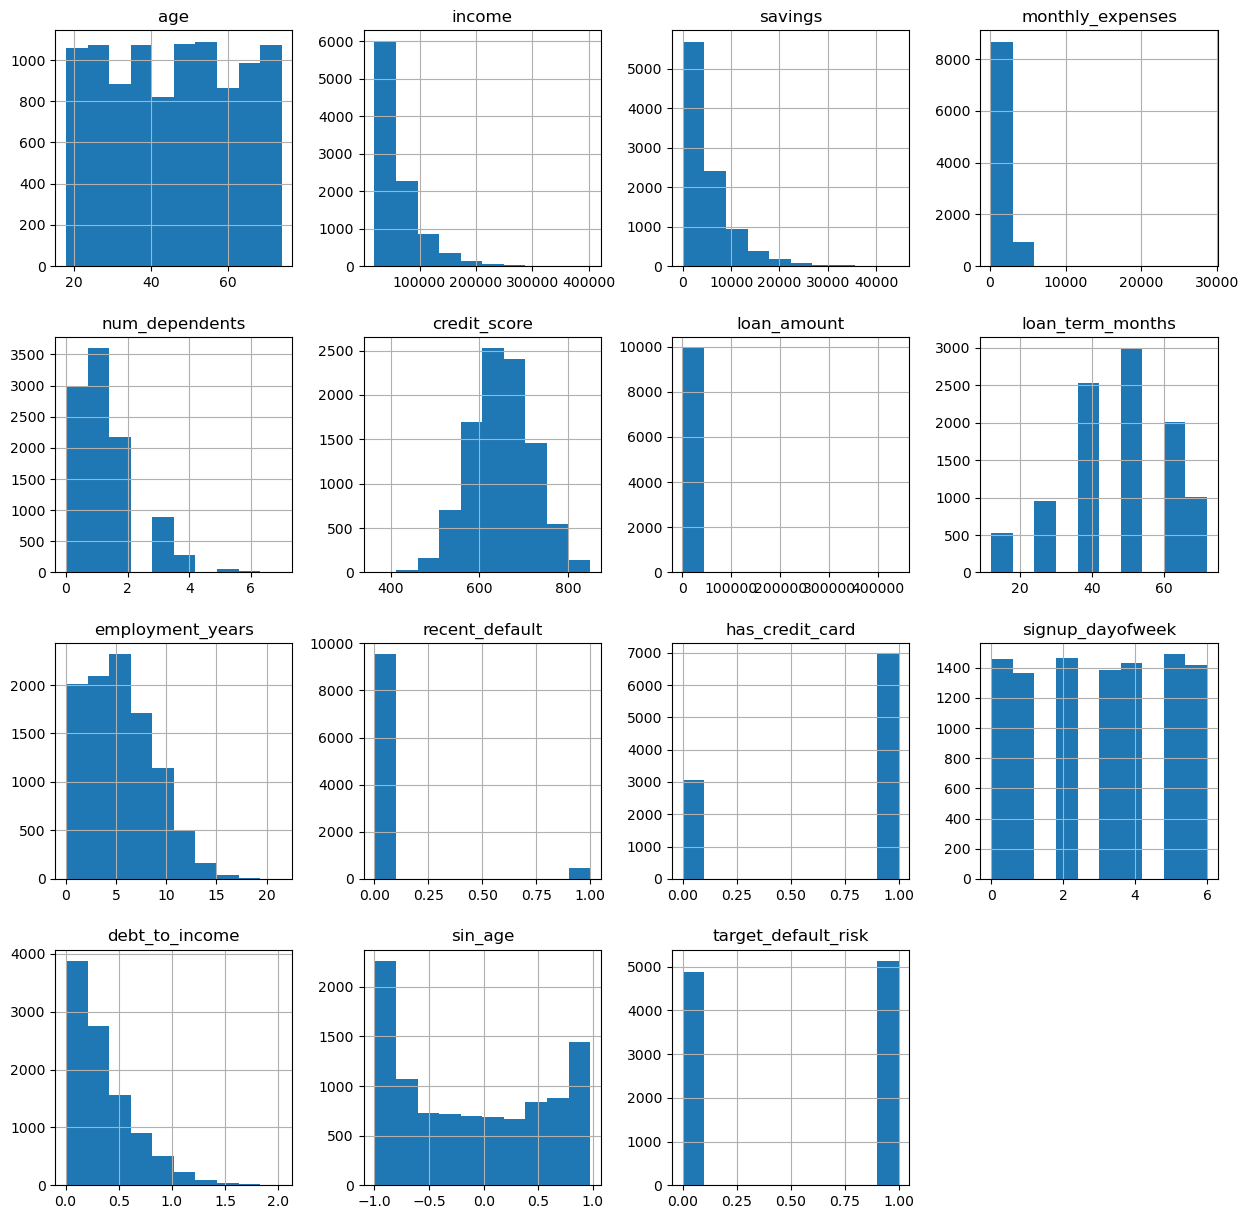

In [12]:
df.hist(figsize=(15,15)) 
plt.show()

<Axes: >

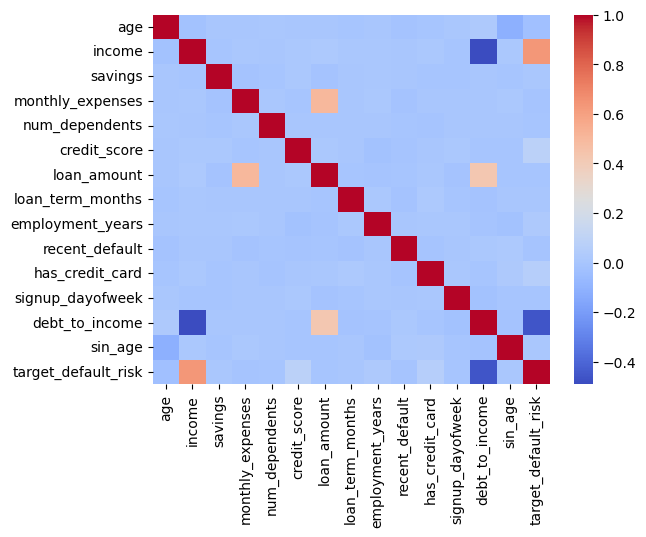

In [13]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm')

In this step, I analyzed the relationship between numerical features using a correlation heatmap.

First, I selected only numerical columns from the dataset. Then, I calculated the correlation matrix to understand how strongly each feature is related to others, including the target variable **target_default_risk.**

The heatmap uses the **coolwarm** color scale:

**Red colors** indicate a strong positive correlation

**Blue colors** indicate a strong negative correlation

**Light colors** indicate weak or no correlation

**Key observations**:

**Credit score** shows a **negative correlation** with default risk, meaning higher credit scores reduce the chance of default.

**Debt-to-income ratio** has a **positive correlation** with default risk, indicating higher financial burden increases risk

**Recent default history** is positively correlated with default risk.

Most other features have **low correlation**, which suggests they contribute independently to the model.

# Boxplot Analysis of Numerical Features

i used boxplots to understand the distribution and outliers in numerical features like income, savings, expenses, loan amount, credit score, and debt-to-income ratio before model training.

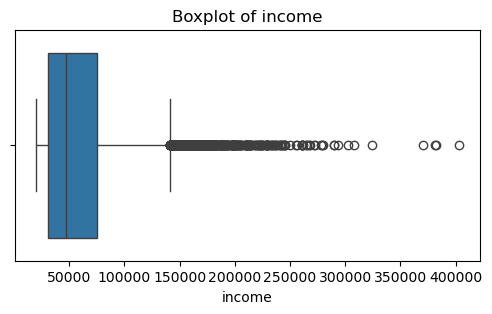

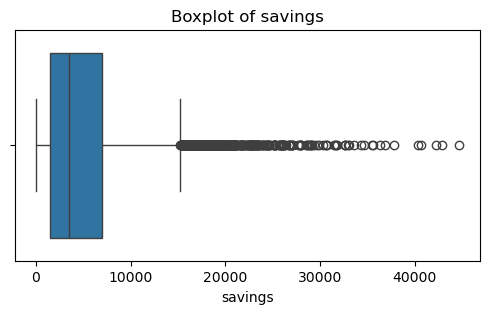

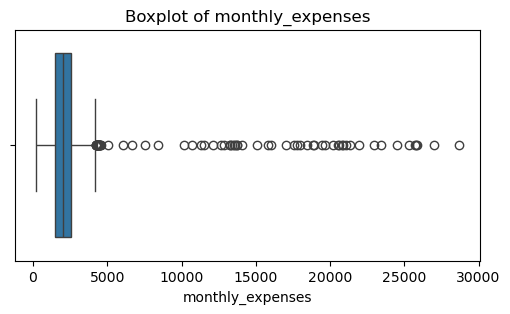

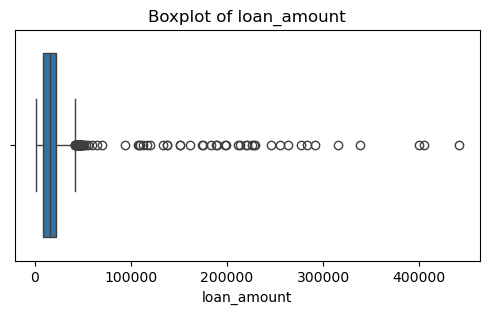

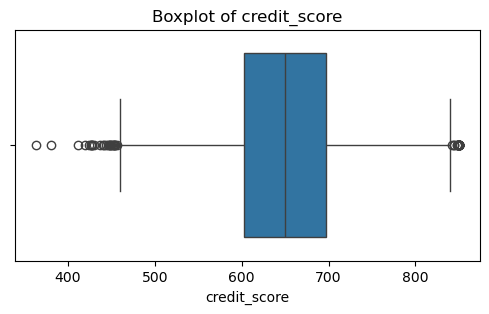

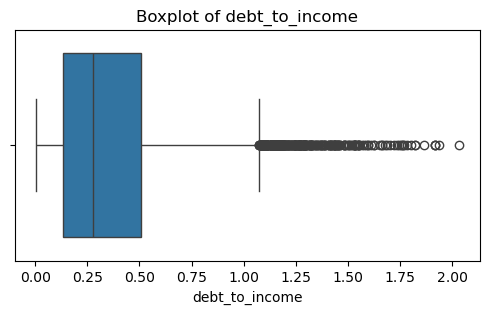

In [14]:
num_cols = ['income','savings','monthly_expenses','loan_amount','credit_score','debt_to_income']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

# Key observations

**income**:

income values show a wide spread with several high-income outliers, indicating variation in customers’ earning capacity.

**Savings**:

Savings are right-skewed, with many customers having lower savings and a few customers with very high savings acting as outliers.

**Monthly Expenses**:

Most customers have moderate expenses, but some extreme expense values appear as outliers.

**Loan Amount**:

oan amounts are highly skewed, with several large loan values, which may influence model learning if not scaled properly.

**Credit Score**:

Credit scores are relatively well-distributed, with fewer outliers, indicating a stable and meaningful feature.

**Debt-to-Income Ratio**:

This feature shows noticeable outliers, highlighting customers with high financial risk.

# Outlier Detection Using IQR Method

in this step, I identified outliers in numerical features using the Interquartile Range (IQR) method.

First, i  calculated the following  statistics :

**Q1(25th percentile)**

**Q3 (75th percentile)**

**IQR = Q3 − Q1**

Using these values, I defined the bounds for detecting outliers:

**Lower bound = Q1 − 1.5 × IQR**

**Upper bound = Q3 + 1.5 × IQR**

Any data points lying outside these bounds are considered outliers.

The code loops through each numerical column (income, savings, monthly expenses, loan amount, credit score, and debt-to-income ratio) and:

-Calculates lower and upper bounds

-Identifies outlier values

-Prints the total number of outliers for each feature

In [15]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"{col}:")
    print("  Lower bound:", lower)
    print("  Upper bound:", upper)
    print("  Outliers found:", outliers.shape[0])
    print("-"*40)

income:
  Lower bound: -34495.125
  Upper bound: 140959.875
  Outliers found: 479
----------------------------------------
savings:
  Lower bound: -6789.0
  Upper bound: 15251.0
  Outliers found: 472
----------------------------------------
monthly_expenses:
  Lower bound: -158.0
  Upper bound: 4186.0
  Outliers found: 70
----------------------------------------
loan_amount:
  Lower bound: -11494.375
  Upper bound: 41846.625
  Outliers found: 89
----------------------------------------
credit_score:
  Lower bound: 459.168587917705
  Upper bound: 840.5587389910922
  Outliers found: 62
----------------------------------------
debt_to_income:
  Lower bound: -0.43200000000000005
  Upper bound: 1.072
  Outliers found: 318
----------------------------------------


# Splitting Features and Target Variable

in this step, I separated the dataset into input features (X) and the target variable (y).

X contains all independent variables such as age, income, savings, expenses, loan details, credit score, etc.

y contains the target column target_default_risk, which represents whether a customer is likely to default or not

In [16]:
X=df.drop("target_default_risk",axis=1)

In [17]:
X

,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,home_ownership,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age
0,CUST006253,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,RENT,HS,Single,West,1,1,2020-07-05,6,0.404,0.141120
1,CUST004685,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,RENT,Bachelors,Married,East,0,0,2018-10-03,2,0.066,0.808496
2,CUST001732,68,38890.0,1929.0,1696.0,0,658.003360,12633.0,72,2.2,OWN,Bachelors,Single,East,0,1,2018-05-30,2,0.325,0.494113
3,CUST004743,49,29049.0,6284.0,2485.0,1,707.477864,20881.0,36,2.7,OWN,HS,Married,South,0,1,2018-04-22,6,0.719,-0.982453
4,CUST004522,74,60063.0,924.0,3179.0,2,564.768511,19438.0,36,10.3,MORTGAGE,Masters,Single,West,0,0,2019-12-03,1,0.324,0.898708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST005735,54,44507.0,5975.0,2520.0,1,699.633352,31089.0,48,5.3,RENT,HS,Single,East,0,1,2020-02-27,3,0.699,-0.772764
9996,CUST005192,50,20651.0,10203.0,1020.0,3,680.774066,8977.0,60,9.6,RENT,PhD,Divorced,North,0,0,2018-08-23,3,0.435,-0.958924
9997,CUST005391,43,33827.0,3848.0,2562.0,1,655.562748,24319.0,60,4.3,OTHER,HS,Married,West,0,0,2019-01-18,4,0.719,-0.916166
9998,CUST000861,44,38273.0,18880.0,1060.0,2,653.277645,1000.0,24,11.4,MORTGAGE,Other,Single,North,0,1,2019-08-04,6,0.026,-0.951602


In [18]:
Y=df["target_default_risk"]

In [19]:
Y

0       1
1       1
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    0
9999    1
Name: target_default_risk, Length: 10000, dtype: int64

# Feature scaling using StandardScaler


I applied standardization so that all numerical features have:
    
Mean = 0

Standard deviation = 1

This ensures that features with larger values do not dominate the model.

In [20]:
num_columns=X.select_dtypes(include=['int64','float64']).columns

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X[num_columns])

# Missing value imputation using KNNImputer

I used the KNN Imputer to fill missing values based on the nearest neighbors, which preserves relationships between features better than simple mean or median imputation

In [23]:
from sklearn.impute import KNNImputer

In [24]:
imputer=KNNImputer(n_neighbors=5)
X_scaled_imputed=imputer.fit_transform(X_scaled)

# Inverse transformation

After imputation, I converted the scaled values back to their original scale to keep the data interpretable.

In [25]:
X_imputed=scaler.inverse_transform(X_scaled_imputed)

In [26]:
X[num_columns]=X_scaled_imputed

Finally, I verified that there are no missing values remaining in the dataset.

In [27]:
X.isnull().sum()

customer_id         0
age                 0
income              0
savings             0
monthly_expenses    0
num_dependents      0
credit_score        0
loan_amount         0
loan_term_months    0
employment_years    0
home_ownership      0
education           0
marital_status      0
region              0
recent_default      0
has_credit_card     0
signup_date         0
signup_dayofweek    0
debt_to_income      0
sin_age             0
dtype: int64

In [28]:
cat_columns=X.select_dtypes(include='object').columns

In [29]:
cat_columns

Index(['customer_id', 'home_ownership', 'education', 'marital_status',
       'region', 'signup_date'],
      dtype='object')

# Encoding Categorical Features (One-Hot-Encoding)

In this step, I converted categorical variables into numerical format using One-Hot Encoding, which is required for machine learning models.

**What I did**:

**Identified categorical columns**

I selected all columns with object data type, such as:

-home_ownership

-education

-marital_status

-region

-signup_date

-has_credit_card
(and other categorical fields)

**Applied One-Hot Encoding**

I used OneHotEncoder to convert each category into separate binary columns (0 or 1).

-drop='first' avoids dummy variable trap

-handle_unknown='ignore' safely handles unseen categories

**Created encoded DataFrame**

The encoded output was converted into a pandas DataFrame with proper column names.

**Merged with numerical features**

I removed the original categorical columns and concatenated the encoded columns with the existing numerical data.

**Final feature set**

After encoding, all features are numerical and ready for model training.

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
encoder=OneHotEncoder(drop="first",sparse_output=False,handle_unknown='ignore')

In [32]:
encoded_data=encoder.fit_transform(X[cat_columns])

In [33]:
encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(cat_columns),
    index=X.index
)

In [34]:
X=X.drop(columns=cat_columns)

In [35]:
X=pd.concat([X,encoded_df],axis=1)

In [36]:
X.shape

(10000, 12008)

In [37]:
X.head()

,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,recent_default,...,signup_date_2023-06-14,signup_date_2023-06-15,signup_date_2023-06-16,signup_date_2023-06-17,signup_date_2023-06-18,signup_date_2023-06-19,signup_date_2023-06-20,signup_date_2023-06-21,signup_date_2023-06-22,signup_date_2023-06-23
0,-0.963811,0.176206,1.212940,0.136942,0.708613,-0.644775,0.668510,0.152381,-0.438552,4.502954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.449922,0.276624,-0.801923,-0.106940,-0.193160,0.473957,-0.717238,-0.623095,-1.375998,-0.222076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.345214,-0.522359,-0.617059,-0.278667,-1.094933,0.112250,-0.222737,1.703334,-0.936570,-0.222076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.190701,-0.769228,0.246766,0.290630,-0.193160,0.819891,0.290172,-0.623095,-0.790094,-0.222076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.709796,0.008783,-0.816403,0.791381,0.708613,-1.221302,0.200437,-0.623095,1.436341,-0.222076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split Data into train & test

In [38]:
from sklearn.model_selection import train_test_split


-**Train–test split**

The dataset is divided into training and testing sets using train_test_split.

 -test_size = 0.2 means 80% data for training and 20% for testing
 
 -random_state = 42 ensures reproducible results
 
 -stratify = y keeps the class distribution balanced
 
**Importing Logistic Regression**

The Logistic Regression algorithm is imported from sklearn.linear_model.

**Model initialization**

The model is initialized with max_iter = 1000 to allow sufficient iterations for convergence.

**Model training**

The model is trained using the training dataset (X_train, y_train) by calling the fit() method.

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [42]:
Y_pred_model=model.predict(X_test)

# Model Evaluation Results

After training the Logistic Regression model, I evaluated its performance using accuracy, classification report, and confusion matrix.

1️⃣ **Accuracy**

The model achieved an accuracy of 93.1%, which means it correctly predicted the default risk for most customers in the test dataset.

2️⃣ **Classification Report**

The classification report provides precision, recall, and F1-score for both classes:

**Class 0 (No Default)**

-Precision: 0.91

-Recall: 0.95

-F1-score: 0.93

**Class 1 (Default)**

-Precision: 0.95

-Recall: 0.91

-F1-score: 0.93

Macro and weighted averages are around 0.93, showing balanced performance across classes.

3️⃣ **Confusion Matrix**

The confusion matrix shows:

Correct predictions for both default and non-default customers

A small number of misclassifications, which indicates good model reliability

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Logistic Regression Accuracy:",
      accuracy_score(Y_test, Y_pred_model))

print("\nClassification Report (Logistic Regression):\n")
print(classification_report(Y_test, Y_pred_model))

print("\nConfusion Matrix:\n")
print(confusion_matrix(Y_test, Y_pred_model))

Logistic Regression Accuracy: 0.931

Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       974
           1       0.95      0.91      0.93      1026

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000


Confusion Matrix:

[[930  44]
 [ 94 932]]


# Model Training and Evaluation (Random Forest Classifier)

In this step, I trained a Random Forest Classifier to predict credit default risk and compared its performance with Logistic Regression.

**What I did:**

-**Model selection**

I used **Random Forest**, an ensemble learning method that combines multiple decision trees to improve prediction accuracy and reduce overfitting.

-**Model initialization**

The model was initialized with:

-n_estimators = 200 (number of decision trees)

-random_state = 42 for reproducibility

**Model training**

The model was trained using the training dataset (X_train, y_train).

**Prediction**

Predictions were made on the test dataset using the trained Random Forest model.

**Model evaluation**

The model performance was evaluated using:

**Accuracy score**

**Classification report** (precision, recall, F1-score)

**Results**:

-**Random Forest Accuracy**: 93.2%

-Balanced precision and recall for both default and non-default classes

-Slight improvement compared to Logistic Regression

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, Y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [45]:
Y_pred_rf = rf.predict(X_test)


In [46]:
print("Random Forest Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("\nClassification Report:\n")
print(classification_report(Y_test, Y_pred_rf))

Random Forest Accuracy: 0.932

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       974
           1       0.94      0.92      0.93      1026

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



# Model Training and Evaluation (Decision Tree Classifier)

In this step, I trained a Decision Tree Classifier to predict credit default risk and evaluated its performance.

**What I did**:

-**Model selection**

I used a **Decision Tree Classifier**, which makes decisions based on feature splits and is easy to interpret.

-**Model initialization**

The model was initialized with:

 -max_depth = 5 to control tree complexity and reduce overfitting
 
 -random_state = 42 for reproducibility
 
-**Model training**

The model was trained using the training dataset (X_train, y_train).

-**Prediction**

Predictions were generated on the test dataset using the trained Decision Tree model.

**Model evaluation**

The model was evaluated using:

**Accuracy score**

**Classification report** (precision, recall, F1-score)

**Results**:

**Decision Tree Accuracy**: 94%

Good balance between precision and recall for both classes

Slightly better accuracy compared to Logistic Regression and Random Forest in this setup

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt=DecisionTreeClassifier(
random_state=42,max_depth=5)
dt.fit(X_train,Y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [49]:
Y_pred=dt.predict(X_test)

In [50]:
print("DecisionTreeClassifier:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n")
print(classification_report(Y_test, Y_pred))

DecisionTreeClassifier: 0.944

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       974
           1       0.93      0.96      0.95      1026

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



# Model Training and Evaluation (Support Vector Machine – SVM)

In this step, I trained a Support Vector Machine (SVM) model to predict credit default risk and evaluated its performance.

**What I did**:

-**Model selection**
I used **LinearSVC**, which is suitable for large datasets and high-dimensional feature spaces.

-**Model initialization**

The model was initialized with:

-max_iter = 5000 to ensure proper convergence

-random_state = 42 for reproducibility

**Model training**

The SVM model was trained using the training dataset (X_train, y_train).

**Prediction**

Predictions were generated on the test dataset using the trained SVM model.

**Model evaluation**

The model performance was evaluated using:

**Accuracy score**

Classification report (precision, recall, F1-score)

**Results**:

-**SVM Accuracy: ~90%**

-Balanced performance across both default and non-default classes

-Slightly lower accuracy compared to tree-based models in this project

In [51]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

svm = LinearSVC(random_state=42, max_iter=5000)
svm.fit(X_train, Y_train)

Y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(Y_test, Y_pred_svm))
print(classification_report(Y_test, Y_pred_svm))

SVM Accuracy: 0.8995
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       974
           1       0.92      0.88      0.90      1026

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



# Model Training and Evaluation (XGBoost Classifier)

In this step, I trained an XGBoost (Extreme Gradient Boosting) classifier to predict credit default risk and evaluated its performance.

**What I did**:

-**Model selection**

I used **XGBoost**, a powerful gradient boosting algorithm that builds trees sequentially and focuses on correcting previous errors.

-**Model configuration**

The model was initialized with the following parameters:

-n_estimators = 200 – number of boosting rounds

-max_depth = 6 – controls model complexity

-learning_rate = 0.1 – step size shrinkage

-subsample = 0.8 and colsample_bytree = 0.8 – reduce overfitting

-objective = 'binary:logistic' – binary classification

-eval_metric = 'logloss'

-random_state = 42 for reproducibility

**Model training**

The model was trained using the training dataset (X_train, y_train).

**Prediction**

Predictions were generated on the test dataset.

**Model evaluation**

The model was evaluated using:

**Accuracy score**

**Classification report** (precision, recall, F1-score)

**Results**:

-**XGBoost Accuracy: ~95.6%**

-Highest performance among all tested models

-Balanced precision and recall for both default and non-default classes


In [52]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(Y_test, Y_pred_xgb))
print(classification_report(Y_test, Y_pred_xgb))

XGBoost Accuracy: 0.9565
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       974
           1       0.96      0.95      0.96      1026

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



# Conclusion

In this project, an end-to-end **Credit Default Risk Prediction system** was developed using machine learning techniques. The complete data science workflow was followed, starting from data preprocessing and exploratory data analysis to model training and evaluation.

Various classification models were implemented and compared, including:

 -Logistic Regression
 
 -Decision Tree
 
 -Random Forest
 
 -Support Vector Machine (SVM)
 
 -XGBoost
 
Among all the models, **XGBoost achieved the best performance**, with an accuracy of approximately **95–96%**, along with balanced precision and recall for both default and non-default classes. This indicates that the model is reliable and robust for predicting credit default risk.

Overall, the project demonstrates how machine learning can be effectively applied to solve real-world financial problems and support better decision-making in lending systems.

**Model Comparison Summary**

-**Logistic Regression → ~93%**

-**Decision Tree → ~94%**

-**Random Forest → ~93%**

-**SVM → ~89–90%**

-**XGBoost → ~95–96% (Best Model)**

**Business Impact**

This model can help financial institutions to:

Identify **high-risk customers** in advance

Reduce **loan default rates**

Improve **credit approval decisions**

Minimize **financial losses**

By using data-driven predictions, lenders can make more informed, fair, and consistent credit decisions.

**Future Improvements**

Although the current model achieved strong performance, the system can be further improved in the future. Hyperparameter tuning using **GridSearchCV**was explored; however, due to system resource limitations, complete tuning results could not be obtained.

Future enhancements may include:

-Performing **extensive hyperparameter tuning** using GridSearchCV or Optuna on higher computational resources

-Handling class imbalance using techniques such as **SMOTE**

-Adding **model explainability** using SHAP values or feature importance analysis

Deploying the trained model as a **web application** using Flask or FastAPI

-Evaluating performance using additional metrics such as **ROC-AUC and Precision-Recall curves**

**Final Note**

This project demonstrates my ability to:

-Handle real-world structured data

-Apply multiple machine learning algorithms

-Evaluate and compare model performance

-Build a complete, prediction-ready ML pipeline
